#### Loading data

In [1]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/seBrainSim.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/updated/comp_trees/trMCorUPGMA.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/mapDf.RData")
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))

#### Reading all the nwk files for the trees

In [31]:
treesCons0 <- read.tree("/fs/cbcb-lab/rob/students/noor/Uncertainity/terminus/test/cluster_nwk.txt")
txpsCons0 <- rownames(seBrainSim)[as.numeric(unlist(lapply(treesCons0, function(tr) tr$tip)))+1]
treesCons <- read.tree("/fs/cbcb-lab/rob/students/noor/Uncertainity/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/out_term/cluster_nwk.txt")
txpsCons <- rownames(seBrainSim)[as.numeric(unlist(lapply(treesCons, function(tr) tr$tip)))+1]
treesMeanInf <- read.tree("/fs/cbcb-lab/rob/students/noor/Uncertainity/terminus/1_2/group_nwk.txt")
txpsMeanInf <- rownames(seBrainSim)[as.numeric(unlist(lapply(treesMeanInf, function(tr) tr$tip)))+1]
treesMeanInf0 <- read.tree("/fs/cbcb-lab/rob/students/noor/Uncertainity/terminus/2_1/group_nwk.txt")
txpsMeanInf0 <- rownames(seBrainSim)[as.numeric(unlist(lapply(treesMeanInf0, function(tr) tr$tip)))+1]
treesMeanInf0 <- read.tree("/fs/cbcb-lab/rob/students/noor/Uncertainity/terminus/2_1/group_nwk.txt")
txpsMeanInf0 <- rownames(seBrainSim)[as.numeric(unlist(lapply(treesMeanInf0, function(tr) tr$tip)))+1]
treesThr <- read.tree("../brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/out_term_hirak/cluster_nwk.txt")
txpsThr <- rownames(seBrainSim)[as.numeric(unlist(lapply(treesThr, function(tr) tr$tip)))+1]
                                                              
childTxps <- Descendants(trMeanCorUPGMA, length(trMeanCorUPGMA$tip)+1, "child")
length(childTxps)
head(childTxps)
childTxps <- childTxps[childTxps > length(trMeanCorUPGMA$tip)]
length(childTxps)
txpsCor <- trMeanCorUPGMA$tip[unlist(Descendants(trMeanCorUPGMA, childTxps))]
rm(childTxps)

[1] 57245

[1] 1 2 3 4 5 6

[1] 2

In [32]:
length(txpsCons0)
length(txpsCons)
length(txpsMeanInf)
length(txpsMeanInf0)
length(txpsCor)
length(txpsThr)

[1] 134645

[1] 122177

[1] 121237

[1] 135493

[1] 72362

[1] 26421

In [3]:
txpsAll <- Reduce(union,list(txpsCons0, txpsCons, txpsMeanInf, txpsMeanInf0, txpsCor))
length(txpsAll)
se <- scaleInfReps(seBrainSim)
se <- labelKeep(se)

[1] 139299

### Testing infRV reduction

#### Consensus Tree

In [91]:
treeCons <- mergeTree(treesCons, se = mapDf)
mb <- mergeLeaves(treeCons, se[txpsAll,])
treeCons <- mb[["tree"]]
# yCons <- mb[["ySwish"]]
rm(mb)
gc()
# yMeanInf <- runSwishTree(treeMC, yMeanInf, type = "union")
# sum(rownames(yMeanInf) != treeMC$tip)

# yAggMeanInf <- prepSwish(treeMC, yMeanInf)

yConsNS <- seBrainSim[treeCons$tip,]
yConsNS <- computeInfRV(yConsNS, meanVariance=F)
# mcols(yConsNS)[["meanInfRV"]] <- mcols(yConsNS)[["meanInfRV"]]

yAggConsNS <- prepSwish(treeCons, yConsNS)
yAggConsNS <- computeInfRV(yAggConsNS, meanVariance=F)
# mcols(yAggMeanInf)[["meanInfRV"]] <- mcols(yAggMeanInfNS)[["meanInfRV"]]

[1] "Missing txps 17122"


used       (Mb)    gc trigger (Mb)    max used   (Mb)   
Ncells   11431863   610.6   21307774  1138.0   21307774  1138.0
Vcells 2864407073 21853.7 5085817767 38801.8 5085498002 38799.3

In [6]:
yCons <- se[treeCons$tip,]
yAggCons <- prepSwish(treeCons, yCons)

In [9]:
rm(yAggCons, yAggConsNS)
gc()

used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells  11093505  592.5   21728112  1160.5   21728112  1160.5
Vcells 718632927 5482.8 1902171417 14512.5 1428803254 10901.0

In [92]:
save(treeCons, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCons.RData")
save(yAggConsNS, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggConsNS.RData")
save(yAggCons, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggCons.RData")

#### Consensus Tree with 0 thr

In [93]:
treeCons0 <- mergeTree(treesCons0, se = mapDf)
mb <- mergeLeaves(treeCons0, se[txpsAll,])
treeCons0 <- mb[["tree"]]
rm(mb)
gc()

yConsNS0 <- seBrainSim[treeCons0$tip,]
yConsNS0 <- computeInfRV(yConsNS0, meanVariance=F)

yAggConsNS0 <- prepSwish(treeCons0, yConsNS0)
yAggConsNS0 <- computeInfRV(yAggConsNS0, meanVariance=F)

[1] "Missing txps 4654"


used       (Mb)    gc trigger (Mb)    max used   (Mb)   
Ncells   11437145   610.9   21307774  1138.0   21307774  1138.0
Vcells 2808800910 21429.5 5085817767 38801.8 5085498002 38799.3

In [12]:
yCons0 <- se[treeCons0$tip,]
yAggCons0 <- prepSwish(treeCons0, yCons0)

In [94]:
save(treeCons0, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCons0.RData")
save(yAggConsNS0, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggConsNS0.RData")
save(yAggCons0, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggCons0.RData")

### MeanInf Tree with 0 threshold

In [109]:
treeMeanInf0 <- mergeTree(treesMeanInf0, se = mapDf)
mb <- mergeLeaves(treeMeanInf0, se[txpsAll,])
treeMeanInf0 <- mb[["tree"]]
rm(mb)
gc()

yMeanInfNS0 <- seBrainSim[treeMeanInf0$tip,]
yMeanInfNS0 <- computeInfRV(yMeanInfNS0, meanVariance=F)

yAggMeanInfNS0 <- prepSwish(treeMeanInf0, yMeanInfNS0)
yAggMeanInfNS0 <- computeInfRV(yAggMeanInfNS0, meanVariance=F)

[1] "Missing txps 3806"


used       (Mb)    gc trigger (Mb)    max used   (Mb)   
Ncells   11438758   610.9   21307774  1138.0   21307774  1138.0
Vcells 3228809434 24633.9 5085817767 38801.8 5085498002 38799.3

In [21]:
# load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeMC0.RData")
# load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInfNS0.RData")
# yMeanInf0 <- se[treeMeanInf0$tip,]
yAggMeanInf0 <- prepSwish(treeMeanInf0, yMeanInf0)
mcols(yAggMeanInf0)[["meanInfRV"]] <- mcols(yAggMeanInfNS0)[["meanInfRV"]]
mcols(yAggMeanInf0)
mcols(yAggMeanInfNS0)
save(yAggMeanInf0, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInf0.RData")
rm(yAggMeanInf0, yAggMeanInfNS0, yMeanInf0)
gc()

DataFrame with 259740 rows and 1 column
                  meanInfRV
                  <numeric>
ENST00000587871.1 0.0130545
ENST00000593183.2 0.0169483
ENST00000605775.5 0.0100000
ENST00000477964.1 0.0301305
ENST00000527570.1 0.0576235
...                     ...
259736            0.0670297
259737            0.0904288
259738            0.1053322
259739            0.1232157
259740            0.0988934

DataFrame with 259740 rows and 1 column
                  meanInfRV
                  <numeric>
ENST00000587871.1 0.0130545
ENST00000593183.2 0.0169483
ENST00000605775.5 0.0100000
ENST00000477964.1 0.0301305
ENST00000527570.1 0.0576235
...                     ...
259736            0.0670297
259737            0.0904288
259738            0.1053322
259739            0.1232157
259740            0.0988934

used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells  11113441  593.6   21728112  1160.5   21728112  1160.5
Vcells 907190313 6921.4 2629794727 20063.8 2434120969 18570.9

In [110]:
treeMeanInf0
yAggMeanInfNS0
save(treeMeanInf0, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeMC0.RData")
save(yAggMeanInfNS0, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInfNS0.RData")
save(yAggMeanInf0, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInf0.RData")


Phylogenetic tree with 139299 tips and 120441 internal nodes.

Tip labels:
  ENST00000587871.1, ENST00000593183.2, ENST00000605775.5, ENST00000477964.1, ENST00000527570.1, ENST00000502939.2, ...

Unrooted; no branch lengths.

class: SummarizedExperiment 
dim: 259740 12 
metadata(7): tximetaInfo quantInfo ... txdbInfo infRepsScaled
assays(105): counts abundance ... mean variance
rownames(259740): ENST00000587871.1 ENST00000593183.2 ... 259739 259740
rowData names(1): meanInfRV
colnames(12): 1_1 2_1 ... 5_2 6_2
colData names(2): names condition

### MeanInf Tree

In [111]:
treeMeanInf <- mergeTree(treesMeanInf, se = mapDf)
mb <- mergeLeaves(treeMeanInf, se[txpsAll,])
treeMeanInf <- mb[["tree"]]
rm(mb)
gc()

yMeanInfNS <- seBrainSim[treeMeanInf$tip,]
yMeanInfNS <- computeInfRV(yMeanInfNS, meanVariance=F)

yAggMeanInfNS <- prepSwish(treeMeanInf, yMeanInfNS)
yAggMeanInfNS <- computeInfRV(yAggMeanInfNS, meanVariance=F)

[1] "Missing txps 18062"


used       (Mb)    gc trigger (Mb)    max used   (Mb)   
Ncells   11418439   609.9   21307774  1138.0   21307774  1138.0
Vcells 3177188986 24240.1 6103061320 46562.7 5085498002 38799.3

In [22]:
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeMC.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInfNS.RData")
yMeanInf <- se[treeMeanInf$tip,]
yAggMeanInf <- prepSwish(treeMeanInf, yMeanInf)
mcols(yAggMeanInf)[["meanInfRV"]] <- mcols(yAggMeanInfNS)[["meanInfRV"]]
save(yAggMeanInf, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInf.RData")
rm(yAggMeanInf, yAggMeanInfNS, yMeanInf)
gc()

used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells  11113464  593.6   21728112  1160.5   21728112  1160.5
Vcells 907568952 6924.3 2629794727 20063.8 2434120969 18570.9

In [112]:
treeMeanInf
yAggMeanInfNS
save(treeMeanInf, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeMC.RData")
save(yAggMeanInfNS, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInfNS.RData")
save(yAggMeanInf, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInf.RData")


Phylogenetic tree with 139299 tips and 99969 internal nodes.

Tip labels:
  ENST00000430817.5, ENST00000597352.1, ENST00000448693.2, ENST00000496822.1, ENST00000487068.1, ENST00000493199.1, ...

Unrooted; no branch lengths.

class: SummarizedExperiment 
dim: 239268 12 
metadata(7): tximetaInfo quantInfo ... txdbInfo infRepsScaled
assays(105): counts abundance ... mean variance
rownames(239268): ENST00000430817.5 ENST00000597352.1 ... 239267 239268
rowData names(1): meanInfRV
colnames(12): 1_1 2_1 ... 5_2 6_2
colData names(2): names condition

###  Correlation tree

In [107]:
childTxps <- Descendants(trMeanCorUPGMA, length(trMeanCorUPGMA$tip)+1, "child")
dropTxps <- childTxps[childTxps <= length(trMeanCorUPGMA$tip)]
treeCor <- drop.tip(trMeanCorUPGMA,dropTxps)
mb <- mergeLeaves(treeCor, se[txpsAll,])
treeCor <- mb[["tree"]]
rm(mb)
gc()

yCorNS <- seBrainSim[treeCor$tip,]
yCorNS <- computeInfRV(yCorNS, meanVariance=F)

yAggCorNS <- prepSwish(treeCor, yCorNS)
yAggCorNS <- computeInfRV(yAggCorNS, meanVariance=F)

[1] "Missing txps 66937"


used       (Mb)    gc trigger (Mb)    max used   (Mb)   
Ncells   11460489   612.1   21307774  1138.0   21307774  1138.0
Vcells 3137570184 23937.8 5085817767 38801.8 5085498002 38799.3

In [23]:
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCor.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggCorNS.RData")
yCor <- se[treeCor$tip,]
yAggCor <- prepSwish(treeCor, yCor)
mcols(yAggCor)[["meanInfRV"]] <- mcols(yAggCorNS)[["meanInfRV"]]
save(yAggCor, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggCor.RData")
rm(yAggCor, yAggCorNS, yCor)
gc()

used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells  11113494  593.6   21728112  1160.5   21728112  1160.5
Vcells 908131567 6928.5 2629794727 20063.8 2434120969 18570.9

In [108]:
treeCor
yAggCorNS
save(treeCor, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCor.RData")
save(yAggCorNS, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggCorNS.RData")
save(yAggCor, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggCor.RData")


Phylogenetic tree with 139299 tips and 72361 internal nodes.

Tip labels:
  ENST00000430817.5, ENST00000597352.1, ENST00000497436.5, ENST00000463827.1, ENST00000479553.5, ENST00000463762.1, ...

Unrooted; includes branch lengths.

class: SummarizedExperiment 
dim: 211660 12 
metadata(7): tximetaInfo quantInfo ... txdbInfo infRepsScaled
assays(105): counts abundance ... mean variance
rownames(211660): ENST00000430817.5 ENST00000597352.1 ... 211659 211660
rowData names(1): meanInfRV
colnames(12): 1_1 2_1 ... 5_2 6_2
colData names(2): names condition

In [34]:
treeThr <- mergeTree(treesThr, se = mapDf)
mb <- mergeLeaves(treeThr, se[txpsAll,])
treeThr <- mb[["tree"]]
rm(mb)
gc()

yThrNS <- seBrainSim[treeThr$tip,]

yAggThrNS <- prepSwish(treeThr, yThrNS)
yAggThrNS <- computeInfRV(yAggThrNS, meanVariance=F)

[1] "Missing txps 112878"


used       (Mb)    gc trigger (Mb)    max used   (Mb)   
Ncells   11286455   602.8   21728112  1160.5   21728112  1160.5
Vcells 1601905527 12221.6 2629794727 20063.8 2506875416 19126.0

In [35]:
yThr <- se[treeThr$tip,]
yAggThr <- prepSwish(treeThr, yThr)
mcols(yAggThr)[["meanInfRV"]] <- mcols(yAggThrNS)[["meanInfRV"]]

In [36]:
treeThr
yAggThrNS
yAggThr
save(treeThr, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeThr.RData")
save(yAggThrNS, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggThrNS.RData")
save(yAggThr, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggThr.RData")


Phylogenetic tree with 139299 tips and 16766 internal nodes.

Tip labels:
  ENST00000340550.5, ENST00000321424.7, ENST00000430817.5, ENST00000597352.1, ENST00000497436.5, ENST00000463827.1, ...

Unrooted; includes branch lengths.

class: SummarizedExperiment 
dim: 156065 12 
metadata(7): tximetaInfo quantInfo ... txdbInfo infRepsScaled
assays(105): counts abundance ... mean variance
rownames(156065): ENST00000340550.5 ENST00000321424.7 ... 156064 156065
rowData names(1): meanInfRV
colnames(12): 1_1 2_1 ... 5_2 6_2
colData names(2): names condition

class: SummarizedExperiment 
dim: 156065 12 
metadata(8): tximetaInfo quantInfo ... infRepsScaled preprocessed
assays(103): counts abundance ... infRep99 infRep100
rownames(156065): ENST00000340550.5 ENST00000321424.7 ... 156064 156065
rowData names(1): meanInfRV
colnames(12): 1_1 2_1 ... 5_2 6_2
colData names(2): names condition

In [21]:
depth <- node.depth(treeMC, 2)
modDep <- depth
modDep[depth > 6]=7
dfInf <- data.frame(infRV = mcols(yAggMeanInfNS)[["meanInfRV"]], depth = modDep)

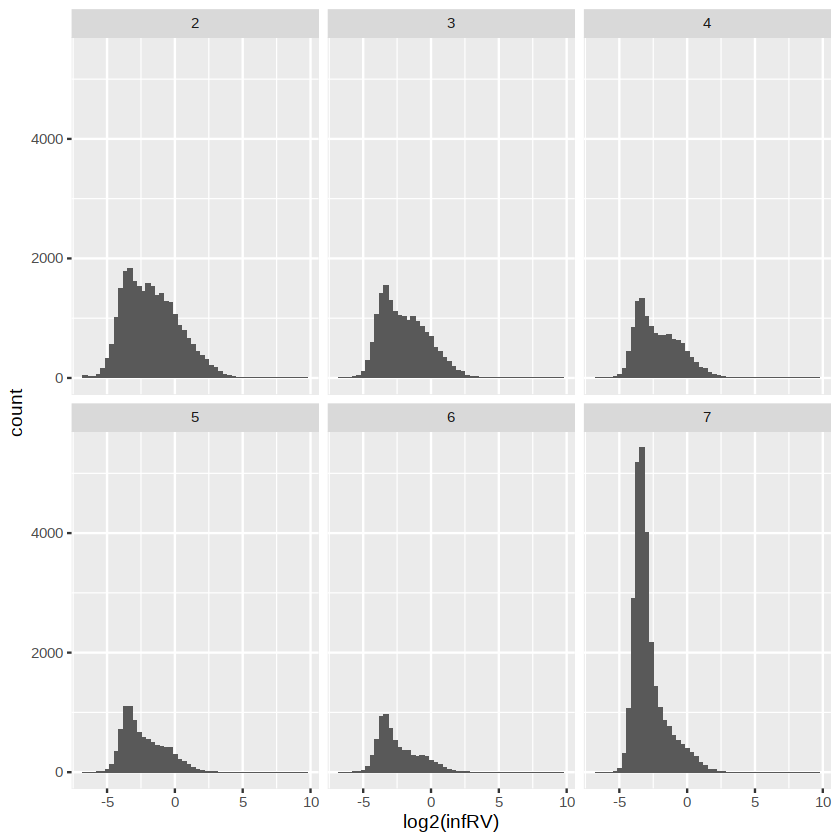

In [22]:
dfInf %>% filter(depth!=1) %>% ggplot(aes(x=log2(infRV))) + geom_histogram(bins=50) + facet_wrap(vars(depth))

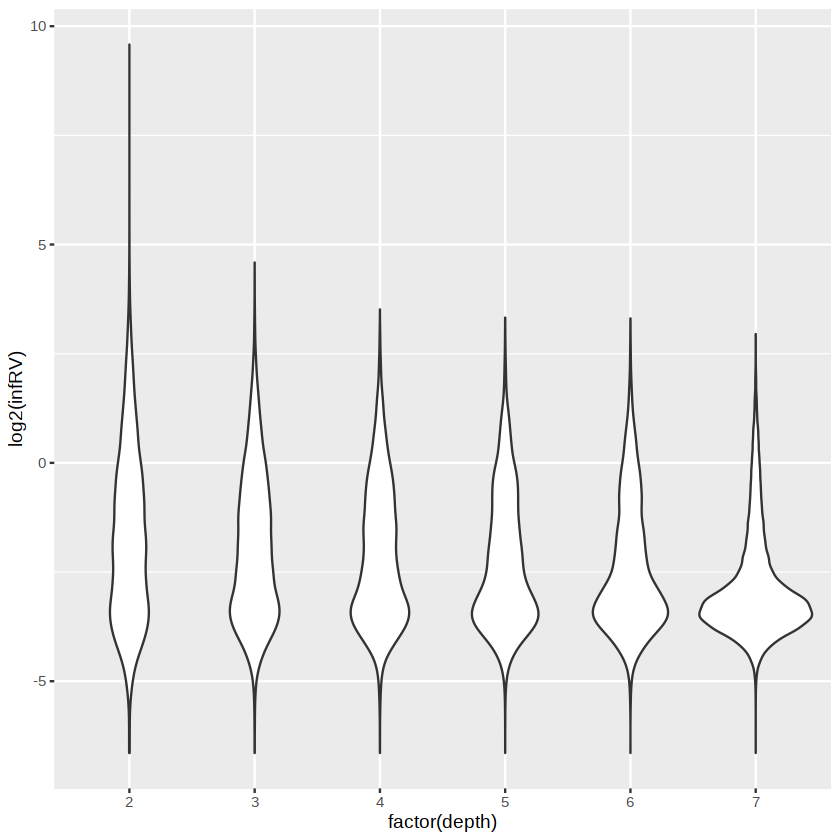

In [23]:
dfInf %>% filter(depth!=1) %>% ggplot(aes(y=log2(infRV), x=factor(depth))) + geom_violin()

In [23]:
nNodes <- length(treeMC$tip)+treeMC$Nnode
desc <- Descendants(treeMC, seq(nNodes))
genesMeanInf <- mclapply(desc[length(treeMC$tip)+1:treeMC$Nnode], function(txps) unique(mapDf[treeMC$tip[txps],1]), mc.cores=1)
save(genesMeanInf, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/genesMeanInf.RData")

In [9]:
nNodes <- length(treeMC0$tip)+treeMC0$Nnode
desc <- Descendants(treeMC0, seq(nNodes))
genesMeanInf0 <- mclapply(desc[length(treeMC0$tip)+1:treeMC0$Nnode], function(txps) unique(mapDf[treeMC0$tip[txps],1]), mc.cores=1)
save(genesMeanInf0, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/genesMeanInf0.RData")

In [113]:
nNodes <- length(treeCons0$tip)+treeCons0$Nnode
desc <- Descendants(treeCons0, seq(nNodes))
genesCons0 <- mclapply(desc[length(treeCons0$tip)+1:treeCons0$Nnode], function(txps) unique(mapDf[treeCons0$tip[txps],1]), mc.cores=1)
save(genesCons0, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/genesCons0.RData")